#Import library


In [1]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
import statsmodels.api as sm
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectPercentile, chi2,SelectKBest
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from matplotlib.figure import Figure

#Set up

In [2]:
plt.rcParams.update({'figure.figsize': (7, 3), 'figure.dpi': 120})

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.float_format', '{:.2f}'.format)

path = '/content/income_evaluation.csv'
df = pd.read_csv(path)

#Studying data


In [7]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32514 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32514 non-null  int64 
 1    workclass       32514 non-null  object
 2    fnlwgt          32514 non-null  int64 
 3    education       32514 non-null  object
 4    education-num   32514 non-null  int64 
 5    marital-status  32514 non-null  object
 6    occupation      32514 non-null  object
 7    relationship    32514 non-null  object
 8    race            32514 non-null  object
 9    sex             32514 non-null  object
 10   capital-gain    32514 non-null  int64 
 11   capital-loss    32514 non-null  int64 
 12   hours-per-week  32514 non-null  int64 
 13   native-country  32514 non-null  object
 14   income          32514 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32514.00,32514.00,32514.00,32514.00,32514.00,32514.00
mean,38.59,189783.53,10.08,1079.21,87.43,40.44
std,13.64,105561.36,2.57,7390.51,403.24,12.35
min,17.00,12285.00,1.00,0.00,0.00,1.00
25%,28.00,117828.50,9.00,0.00,0.00,40.00
50%,37.00,178354.50,10.00,0.00,0.00,40.00
75%,48.00,236983.00,12.00,0.00,0.00,45.00
max,90.00,1484705.00,16.00,99999.00,4356.00,99.00


## Remove blank data in column name

In [3]:
df.columns = df.columns.str.replace(' ', '')
df.columns = df.columns.str.strip()
print(df.info())
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


#Data cleaning

In [4]:
df2 = df[df.duplicated()]
print(len(df2.index))
df = df.drop_duplicates(keep=False)

missing_col = []
cate_columns = [col for col in df.columns if df[col].dtype == "O"]
for col in cate_columns:
    print("name {} : values {}".format(col,df[col].value_counts()))
    if " ?" in df[col].unique():
        missing_col.append(col)


24
name workclass : values  Private             22651
 Self-emp-not-inc     2539
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
name education : values  HS-grad         10487
 Some-college     7273
 Bachelors        5351
 Masters          1721
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           644
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           331
 1st-4th           165
 Preschool          49
Name: education, dtype: int64
name marital-status : values  Married-civ-spouse       14964
 Never-married            10652
 Divorced                  4439
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dty

Checking mode and % data with ? for columns in missing_col

In [6]:
for col in missing_col:
  print(df[col].value_counts())
  print(df[col].mode())

 Private             22651
 Self-emp-not-inc     2539
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64
0     Private
Name: workclass, dtype: object
 Prof-specialty       4132
 Craft-repair         4089
 Exec-managerial      4064
 Adm-clerical         3766
 Sales                3650
 Other-service        3287
 Machine-op-inspct    1998
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1368
 Farming-fishing       990
 Tech-support          926
 Protective-serv       649
 Priv-house-serv       146
 Armed-Forces            9
Name: occupation, dtype: int64
0     Prof-specialty
Name: occupation, dtype: object
 United-States                 29136
 Mexico                          635
 ?                               581
 Philippines                     198
 Germany                         137
 Canada 

Since ? only takes up to 5-6% of each columns in missing_col, we can replace it with mode value

In [6]:
for col in missing_col:
    df[col] = df[col].replace(to_replace=" ?", value=df[col].mode()[0])

Rechecking after replacing

In [7]:
cate_columns = [col for col in df.columns if df[col].dtype == "O"]
for col in cate_columns:
    print("name {} : values {}".format(col,df[col].unique()))
df.head(10)

name workclass : values [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay' ' Never-worked']
name education : values [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
name marital-status : values [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
name occupation : values [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
name relationship : values [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
name race : values [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
name sex : v

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [11]:
print(df.info())
print(df.describe())
df.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32514 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32514 non-null  int64 
 1   workclass       32514 non-null  object
 2   fnlwgt          32514 non-null  int64 
 3   education       32514 non-null  object
 4   education-num   32514 non-null  int64 
 5   marital-status  32514 non-null  object
 6   occupation      32514 non-null  object
 7   relationship    32514 non-null  object
 8   race            32514 non-null  object
 9   sex             32514 non-null  object
 10  capital-gain    32514 non-null  int64 
 11  capital-loss    32514 non-null  int64 
 12  hours-per-week  32514 non-null  int64 
 13  native-country  32514 non-null  object
 14  income          32514 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB
None
           age     fnlwgt  education-num  capital-gain  capital-loss  hours-per-week
cou

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Data visualization

## Adding color palette

In [10]:
colors1 =['#2157b2','#a1cbc8']
colors2 =['#0048cd','#75c7fb','#f2e1d4']
colors = ['#0048cd','#0795ff','#75c7fb','#f2d16a','#f2e1d4']

## Income percentage

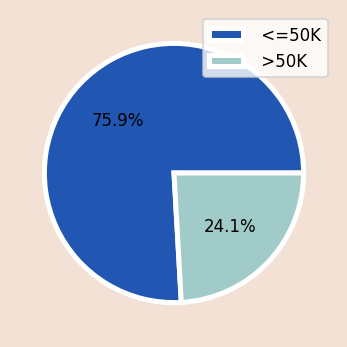

In [11]:
fig = plt.figure()
fig.patch.set_facecolor('#f2e1d4')
# mpl.rcParams.update({'text.color': '#191919'})
plt.pie(df.income.value_counts(), wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },
        autopct='%1.1f%%',colors=['#2157b2','#a1cbc8'])
plt.legend(df.income.unique(), loc="upper right")

plt.tight_layout()
plt.show()

There is  a mild imbalance between two types, however, it will not affect too much to prediction

## Age Analysis

<ipython-input-12-df851a2e3756>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax =  sns.distplot(dfup['age'],  kde=False, label='>50K',color = ['#0048cd'] )
<ipython-input-12-df851a2e3756>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfdown['age'],  kde=False,label='<=50K',color = ['#f2d16a'])


Text(0, 0.5, 'Income')

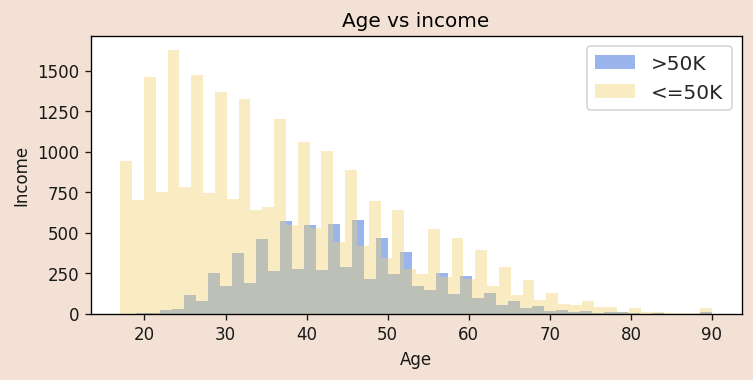

In [12]:
dfup = df[df['income']==' >50K']
dfdown = df[df['income']==' <=50K']
fig = plt.figure()
fig.patch.set_facecolor('#F2E1D4')

ax =  sns.distplot(dfup['age'],  kde=False, label='>50K',color = ['#0048cd'] )

sns.distplot(dfdown['age'],  kde=False,label='<=50K',color = ['#f2d16a'])


sns.set_style("white")
ax.xaxis.label.set_color('#191919')
ax.yaxis.label.set_color('#191919')
ax.tick_params(colors='#191919', which='both')

plt.legend(prop={'size': 12})
plt.title('Age vs income')
plt.xlabel('Age')
plt.ylabel('Income')

The higher age or experience in the field, the higher income you get. It shows with the down trend of income <=50k and raising trend of >50k between 20-50. It also shows that most people will retire between 60-70

## Sex Analysis

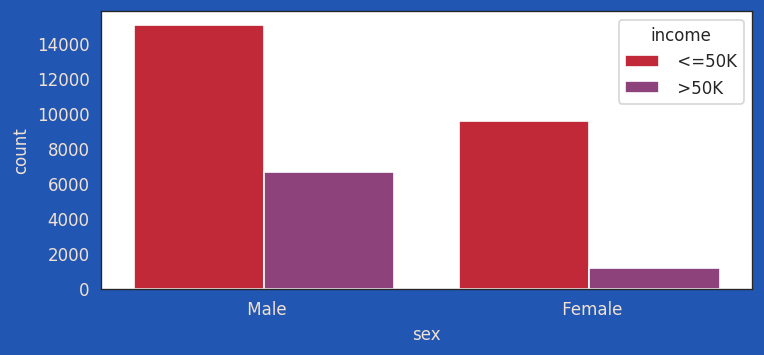

In [9]:
fig = plt.figure()
fig.patch.set_facecolor('#2157b2')
sns.set_style("white")
ax =sns.countplot(data=df, x="sex", hue="income",palette=["#DA1025","#993583"])
ax.xaxis.label.set_color('#F2E1D4')
ax.yaxis.label.set_color('#F2E1D4')
ax.tick_params(colors='#F2E1D4', which='both')
plt.show()

There is a slight difference between male and female income. While male making more than 50k is only half of the one making <=50k, the percentage difference is astounding 90% for female workers. So sex does influence if one makes more or not

## Education analysis

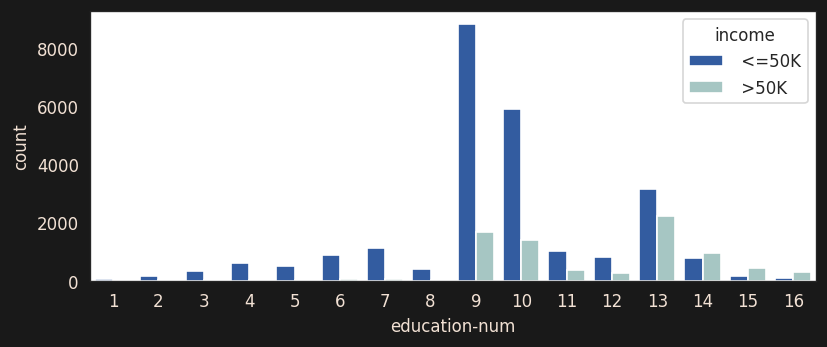

In [14]:
fig = plt.figure()
fig.patch.set_facecolor('#191919')
sns.set_style("white")

ax=sns.countplot(data=df, x="education-num", hue="income",palette=colors1)
ax.xaxis.label.set_color('#F2E1D4')
ax.yaxis.label.set_color('#F2E1D4')
ax.tick_params(colors='#F2E1D4', which='both')
plt.tight_layout()
plt.show()

## Checking relativity between capital-gain/capital-loss agaisnt income

0 Original DataFrame
0 Original DataFrame
1 Capital loss max (4356)
1 Capital loss max (4356)
2 High capital loss (>Cap loss Q3)
2 High capital loss (>Cap loss Q3)
3 High capital gain (>Cap gain Q3)
3 High capital gain (>Cap gain Q3)
4 Capital gain max (99 999)
4 Capital gain max (99 999)


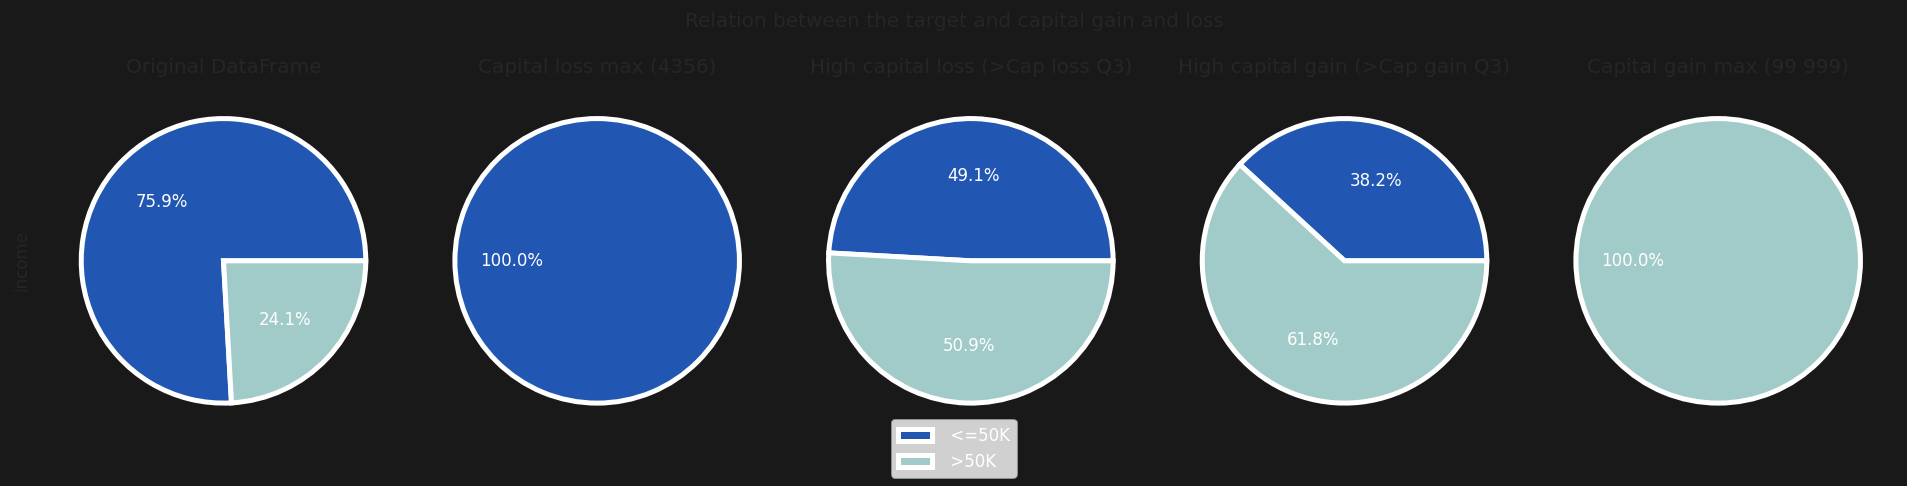

In [15]:
df1 = df[df['capital-loss'] >= 4356]
df2 = df[df['capital-loss']>np.percentile(df['capital-loss'], 75)]
df3 = df[df['capital-gain'] >= 99999]
df4 = df[df['capital-gain']>np.percentile(df['capital-gain'], 75)]

data_list={'Original DataFrame':df,
             'Capital loss max (4356)' : df1,
             'High capital loss (>Cap loss Q3)':df2,
             'High capital gain (>Cap gain Q3)':df4,
             'Capital gain max (99 999)': df3}

fig, axs = plt.subplots(1, 5, sharey=True, figsize=(16,4))
fig.suptitle('Relation between the target and capital gain and loss')
fig.patch.set_facecolor('#191919')
mpl.rcParams.update({'text.color': '#Ffffff'})

for i, data in enumerate(data_list):
    print(i,data)
    if data == 'Capital gain max (99 999)':
        data_list[data].groupby('income')['income'].count().plot.pie(autopct="%.1f%%", labels=None,ax=axs[i],wedgeprops={'linewidth': 3, 'edgecolor': 'white'}, colors=['#a1cbc8'])
    else:
        data_list[data].groupby('income')['income'].count().plot.pie(autopct="%.1f%%", labels=None,ax=axs[i], wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors1)
    axs[i].set_title(data)
    print(i,data)
legend = fig.legend(df.income.unique(), loc="lower center")
frame = legend.get_frame()
frame.set_facecolor('white')
fig.tight_layout()
plt.show()

0 Capital loss max (4356)
0 Capital loss max (4356)
1 High capital loss (>Cap loss Q3)
1 High capital loss (>Cap loss Q3)
2 High capital gain (>Cap gain Q3)
2 High capital gain (>Cap gain Q3)
3 Capital gain max (99 999)
3 Capital gain max (99 999)


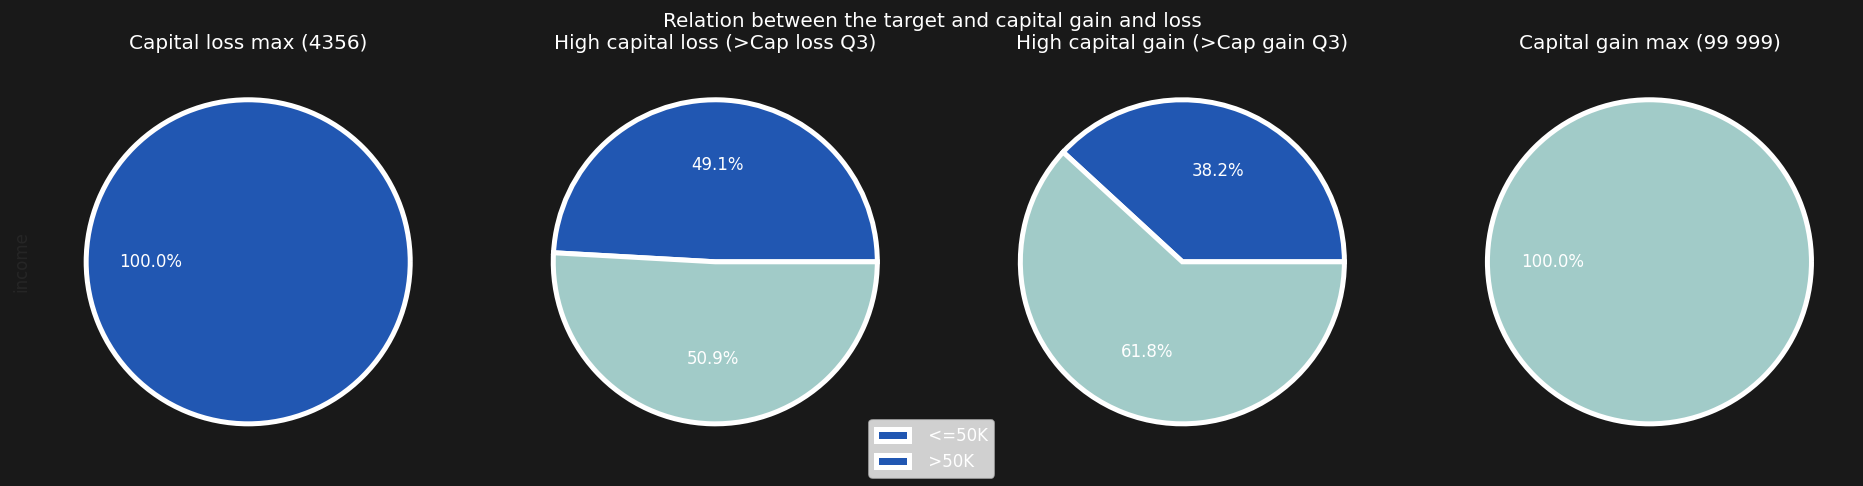

In [16]:
df1 = df[df['capital-loss'] >= 4356]
df2 = df[df['capital-loss']>np.percentile(df['capital-loss'], 75)]
df3 = df[df['capital-gain'] >= 99999]
df4 = df[df['capital-gain']>np.percentile(df['capital-gain'], 75)]

data_list={  'Capital loss max (4356)' : df1,
             'High capital loss (>Cap loss Q3)':df2,
             'High capital gain (>Cap gain Q3)':df4,
             'Capital gain max (99 999)': df3}

fig, axs = plt.subplots(1, 4, sharey=True, figsize=(16,4))
fig.suptitle('Relation between the target and capital gain and loss')
fig.patch.set_facecolor('#191919')
mpl.rcParams.update({'text.color': '#Ffffff'})

for i, data in enumerate(data_list):
    print(i,data)
    if data == 'Capital gain max (99 999)':
        data_list[data].groupby('income')['income'].count().plot.pie(autopct="%.1f%%", labels=None,ax=axs[i],wedgeprops={'linewidth': 3, 'edgecolor': 'white'}, colors=['#a1cbc8'])
    else:
        data_list[data].groupby('income')['income'].count().plot.pie(autopct="%.1f%%", labels=None,ax=axs[i], wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=colors1)
    axs[i].set_title(data)
    print(i,data)
legend = fig.legend(df.income.unique(), loc="lower center")
frame = legend.get_frame()
frame.set_facecolor('white')
fig.tight_layout()
plt.show()

The higher capital gain count, the more people are in >50K income type, while the higher capital loss count, the more people are in <=50K income type. So there are a bond between those columns with income type.

## Native-country analysis

native-country
 United-States    29717
 Mexico             635
Others             2162
Name: income, dtype: int64


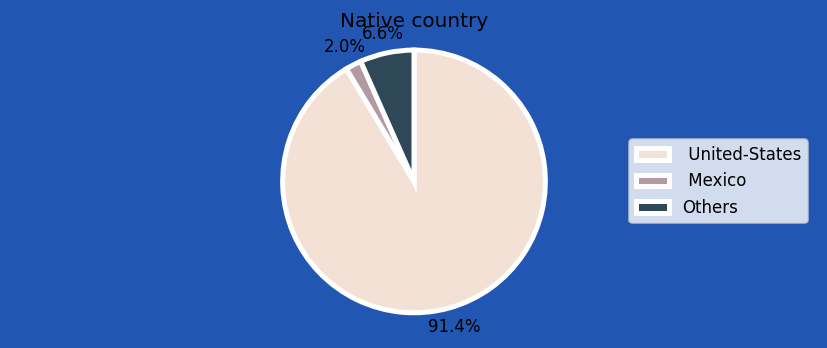

In [17]:
ser = df.groupby('native-country')['income'].count()

ser = ser.sort_values(ascending=False)
ser['Others'] = ser[2:].sum()
ser = ser.iloc[[0,1,-1]]
print(ser)

fig = plt.figure()
fig.patch.set_facecolor('#2157b2')
mpl.rcParams.update({'text.color': 'black'})

plt.pie(ser.values,autopct="%.1f%%",pctdistance=1.15,startangle=90, counterclock=False,wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' },colors=["#F2E1D4","#B39AA2","#2F4858"])
plt.legend(labels=ser.index,loc ="right")
plt.axis('equal')
plt.title("Native country")
plt.tight_layout()
plt.show()

It is far too skewed with  US takes up to 91% of the native country => not reliable

##Relationship analysis

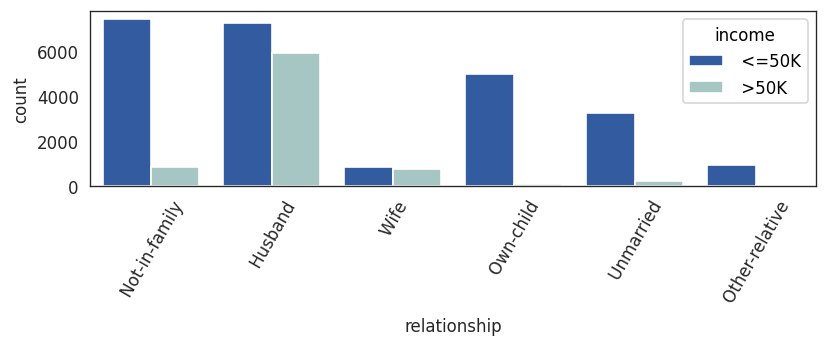

In [18]:
sns.countplot(data=df, x="relationship", hue="income",palette=colors1)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

The data distribution is not imbalanced between relationship types

## Martial status analysis

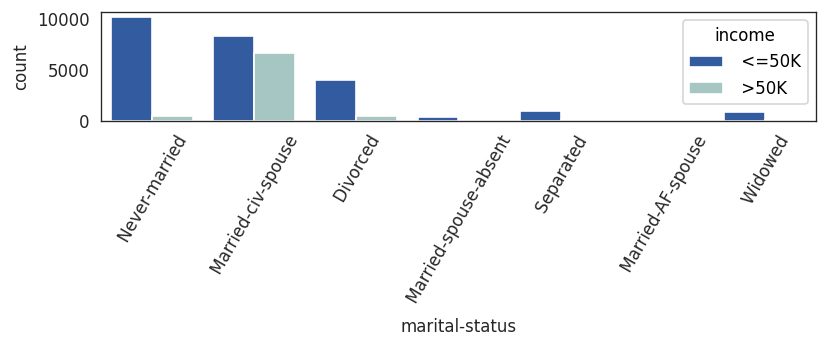

In [19]:
sns.countplot(data=df, x="marital-status", hue="income",palette=colors1)
plt.xticks(rotation=60)
plt.tight_layout()
plt.show()

The data distribution is focused on 'never-married', 'married-civ-spouse', 'divorced' making it not reliable

## Work class analysis

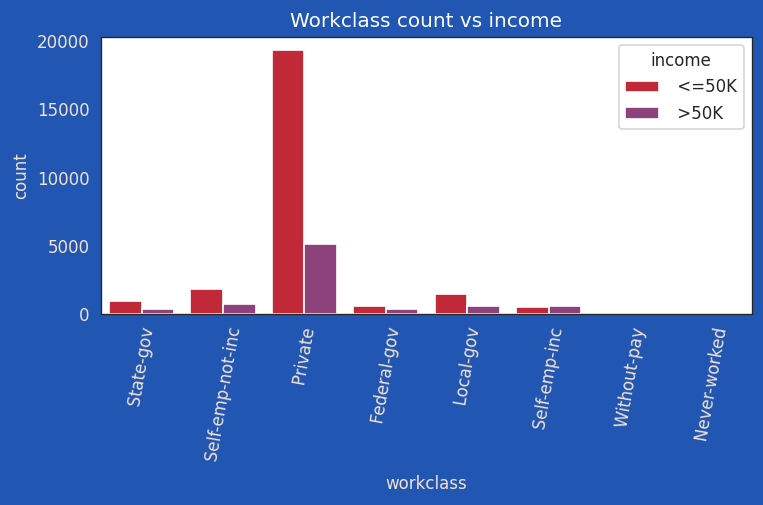

In [10]:
fig = plt.figure()
fig.patch.set_facecolor('#2157b2')
sns.set_style("white")

ax = sns.countplot(data=df, x="workclass", hue="income",palette=["#DA1025","#993583"])
ax.xaxis.label.set_color('#F2E1D4')
ax.yaxis.label.set_color('#F2E1D4')
ax.tick_params(colors='#F2E1D4', which='both')

plt.xticks(rotation=80)
plt.title("Workclass count vs income",color="White")
plt.show()

Same with above, private takes up large percentage of data

## Occupation analysis

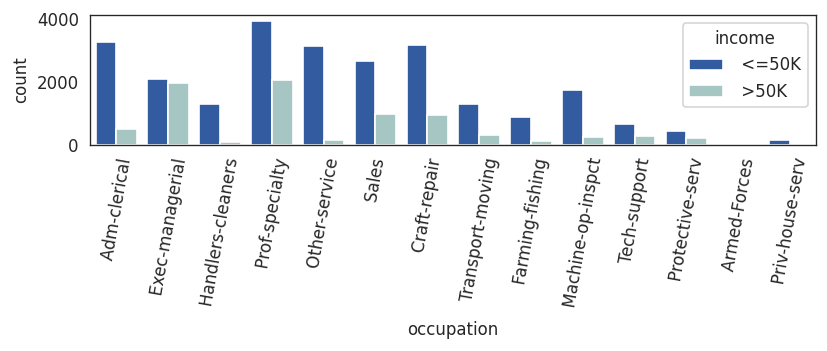

In [21]:
sns.countplot(data=df, x="occupation", hue="income",palette=colors1)
plt.xticks(rotation=80)
plt.tight_layout()
plt.show()

The data is well distributed

## numerical columns correlation analysis

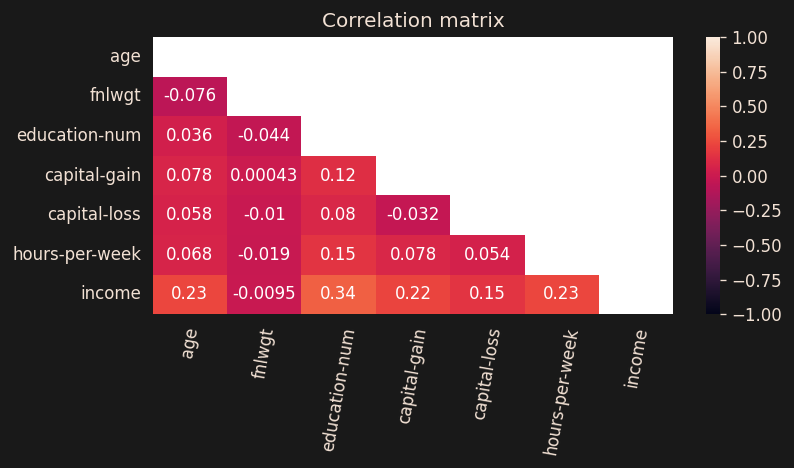

In [22]:
cleanup_nums = {'income':   {" <=50K": 0, " >50K": 1}}
dfcorr = df.replace(cleanup_nums)
num_var = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','income']
corr = dfcorr[num_var].corr()
matrix = np.triu(corr)
fig = plt.figure()
fig.patch.set_facecolor('#191919')
mpl.rcParams.update({'text.color': '#F2E1D4'})
ax = sns.heatmap(corr, vmax=1.0, vmin=-1.0,
             annot=True, mask = matrix)
ax.xaxis.label.set_color('#F2E1D4')
ax.yaxis.label.set_color('#F2E1D4')
ax.tick_params(colors='#F2E1D4', which='both')
cbar1 = ax.collections[0].colorbar
cbar1.ax.tick_params(colors='#F2E1D4')

plt.xticks(rotation=80)
plt.title('Correlation matrix')
plt.show()

Income has high correlation with age, capital-gain/capital-loss, hours-per-week, education-num. However, it is not the same for fnlwgt.

## Chi square test for double checking

In [31]:
label_encoder = preprocessing.LabelEncoder()
categorical_features = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country','income']
dfchi = df
for col in categorical_features:
    dfchi[col] = label_encoder.fit_transform(dfchi[col])



ychi = dfchi.pop('income')
Xchi = dfchi
Xchi_train, Xchi_test, ychi_train, ychi_test  = train_test_split(Xchi,ychi, test_size = 0.3, random_state = 42)


scaler = preprocessing.MinMaxScaler()
Xchi_train = scaler.fit_transform(Xchi_train)
Xchi_test = scaler.fit_transform(Xchi_test)
# print(X_train.head(10))

def select_features(Xchi_train, ychi_train, Xchi_test):
 fs = SelectKBest(score_func=chi2, k='all')
 fs.fit(Xchi_train, ychi_train)
 X_train_fs = fs.transform(Xchi_train)
 X_test_fs = fs.transform(Xchi_test)
 return X_train_fs, X_test_fs, fs

X_train_fs, X_test_fs, fs = select_features(Xchi_train, ychi_train, Xchi_test)
print(fs)
for i in range(len(fs.scores_)):
    print(i)
    print('Feature %s: %f' % (df.columns[i], fs.scores_[i]))

SelectKBest(k='all', score_func=<function chi2 at 0x7ebbd3d03520>)
0
Feature age: 149.093241
1
Feature workclass: 0.017462
2
Feature fnlwgt: 0.133231
3
Feature education: 15.433903
4
Feature education-num: 125.102512
5
Feature marital-status: 134.405643
6
Feature occupation: 5.956603
7
Feature relationship: 531.699234
8
Feature race: 6.337404
9
Feature sex: 354.495466
10
Feature capital-gain: 600.697595
11
Feature capital-loss: 223.242842
12
Feature hours-per-week: 47.608918
13
Feature native-country: 0.327193


The final ranking is:
1. Capital-gain
2. Relationship
3. Sex
4. Capital-loss
5. Age
6. Martial-status
7. Education-num
8. Hours-per-week

The rest is too low to be relative with income

# Data Preprocessing

We first drop columns that do not support the prediction

In [12]:
df = df.drop(['marital-status', 'race', 'fnlwgt', 'education', 'native-country', 'workclass'], axis=1)
df.head()

,age,education-num,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,income
0,39,13,Adm-clerical,Not-in-family,Male,2174,0,40,<=50K
1,50,13,Exec-managerial,Husband,Male,0,0,13,<=50K
2,38,9,Handlers-cleaners,Not-in-family,Male,0,0,40,<=50K
3,53,7,Handlers-cleaners,Husband,Male,0,0,40,<=50K
4,28,13,Prof-specialty,Wife,Female,0,0,40,<=50K


## Encoding

We replace income and sex with 1 and 0 cause there are only two values.
The rest of categorical values, we will be using one hot encoding as they are not ordinal value and turning them all into 1 and 0 with minmax scaler will make it easier to predict.

In [13]:
df['income'].replace({' <=50K':1,' >50K':0},inplace=True)
df['sex'].replace({' Male':1,' Female':0},inplace=True)
df = pd.get_dummies(df, columns = ['occupation', 'relationship'],dtype=int)
df.head(10)

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,occupation_ Handlers-cleaners,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,relationship_ Husband,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife
0,39,13,1,2174,0,40,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,50,13,1,0,0,13,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,38,9,1,0,0,40,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,53,7,1,0,0,40,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,28,13,0,0,0,40,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
5,37,14,0,0,0,40,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
6,49,5,0,0,0,16,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
7,52,9,1,0,0,45,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
8,31,14,0,14084,0,50,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
9,42,13,1,5178,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Split data and train

In [14]:
y = df.pop('income')
X = df
X_train, X_test, y_train, y_test  = train_test_split(X,y, test_size = 0.3, random_state = 42)

## Scale

In [15]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

X_train

array([[0.26027397, 0.66666667, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.61643836, 0.8       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.30136986, 0.86666667, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.01369863, 0.4       , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.47945205, 0.6       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32876712, 0.53333333, 1.        , ..., 0.        , 0.        ,
        0.        ]])

# Build model

The first step is we select a model. We also use cross_val_score while selecting to be more accurate

## Cross_val_score

We will select between: SVM, Logistics Regresion, Random Forest, and Ada boost.

The settings for cross_val_score will be 5 (Due to technical difficulties, 10 fold run will take too long)


In [18]:
xyz=[]
accuracy=[]
std=[]
final_results = []
classifiers=['SVM','Logistic Regression','Random Forest','Ada Boost']
models=[SVC(),LogisticRegression(solver='lbfgs', max_iter=3000),RandomForestClassifier(),AdaBoostClassifier()]
for i in models:
    model = i
    cv_result = cross_val_score(model, X, y, cv=5, scoring="accuracy",n_jobs=-1)
    xyz.append(cv_result.mean())
    std.append(cv_result.std())
    final_results.append(cv_result)
    accuracy.append(cv_result)

new_models_dataframe2=pd.DataFrame({'CV Mean':xyz,'Std':std},index=classifiers)
new_models_dataframe2.style.highlight_max(color='lightgreen', axis=0)
new_models_dataframe2

,CV Mean,Std
SVM,0.80,0.00
Logistic Regression,0.85,0.00
Random Forest,0.84,0.00
Ada Boost,0.86,0.00


After running, Adaboost has the highest accuracy so we will go with this model. Still, we want the model to be even more accurate, so we will be hyperparameter tuning it.

## Hyperparameter tuning

In [17]:
model = AdaBoostClassifier()
grid = dict()
grid['n_estimators'] = [10, 50, 100, 500]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

grid_search = GridSearchCV(estimator=model, param_grid=grid, cv=5, scoring='accuracy')
grid_result = grid_search.fit(X, y)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.868149 using {'learning_rate': 1.0, 'n_estimators': 500}
0.758965 (0.000071) with: {'learning_rate': 0.0001, 'n_estimators': 10}
0.758965 (0.000071) with: {'learning_rate': 0.0001, 'n_estimators': 50}
0.758965 (0.000071) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.758965 (0.000071) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.758965 (0.000071) with: {'learning_rate': 0.001, 'n_estimators': 10}
0.758965 (0.000071) with: {'learning_rate': 0.001, 'n_estimators': 50}
0.758965 (0.000071) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.791228 (0.000635) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.758965 (0.000071) with: {'learning_rate': 0.01, 'n_estimators': 10}
0.791228 (0.000635) with: {'learning_rate': 0.01, 'n_estimators': 50}
0.791167 (0.000607) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.837424 (0.003545) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.791228 (0.000635) with: {'learning_rate': 0.1, 'n_estimators': 10}
0.838685

## Model processing and results

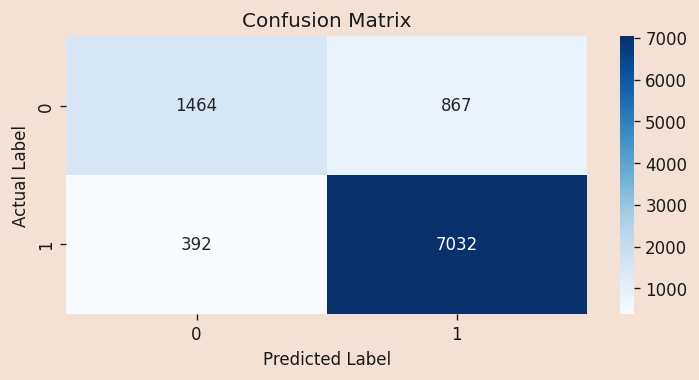

              precision    recall  f1-score   support

           0       0.79      0.63      0.70      2331
           1       0.89      0.95      0.92      7424

    accuracy                           0.87      9755
   macro avg       0.84      0.79      0.81      9755
weighted avg       0.87      0.87      0.87      9755



In [21]:
model = AdaBoostClassifier(learning_rate=1.0,n_estimators=500)
model.fit(X_train,y_train)
cm = confusion_matrix(y_test, model.predict(X_test))
fig = plt.figure()
fig.patch.set_facecolor('#F2E1D4')
mpl.rcParams.update({'text.color': '#191919'})

ax = plt.subplot()
sns.heatmap(cm, annot = True, fmt = "g", ax = ax,cmap="Blues")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("Actual Label")
ax.set_title("Confusion Matrix")
ax.xaxis.label.set_color('#191919')
ax.yaxis.label.set_color('#191919')
ax.tick_params(colors='#191919', which='both')
cbar1 = ax.collections[0].colorbar
cbar1.ax.tick_params(colors='#191919')
plt.show()
print(classification_report(y_test, model.predict(X_test)))

#Conclusion

1. The dataset has 32561 rows and 15 columns. In which, numerical variables are: "age","education-num","capital-gain","capital-loss","hours-per-week", "fnlwgt". The rest are categorical variables and no other types of variables exist.
2. There are 24 duplicated rows that has been drop. In three columns: "Occupation","work-class","martial-status" has rows with "?" values. Which has been replaced with columns mode due to low percentage share (up to 5%)
3. After visualization, 'marital-status', 'race', 'fnlwgt', 'education', 'native-country', 'workclass' columns have been dropped due to imbalance or not correlated with income.
4. The best model is Adaboost with n_estimators at 500 and learning_rate at 1.0
5. The model produce 87% (86,81%) accuracy. With income being relevant with age, sex, relationship, occupation, capital-gain, capital-loss, education-num, hours-per-week